In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.43G/4.43G [00:27<00:00, 174MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3


📸 3fccee4e2d84d9d3.jpg — Faces detected: 0


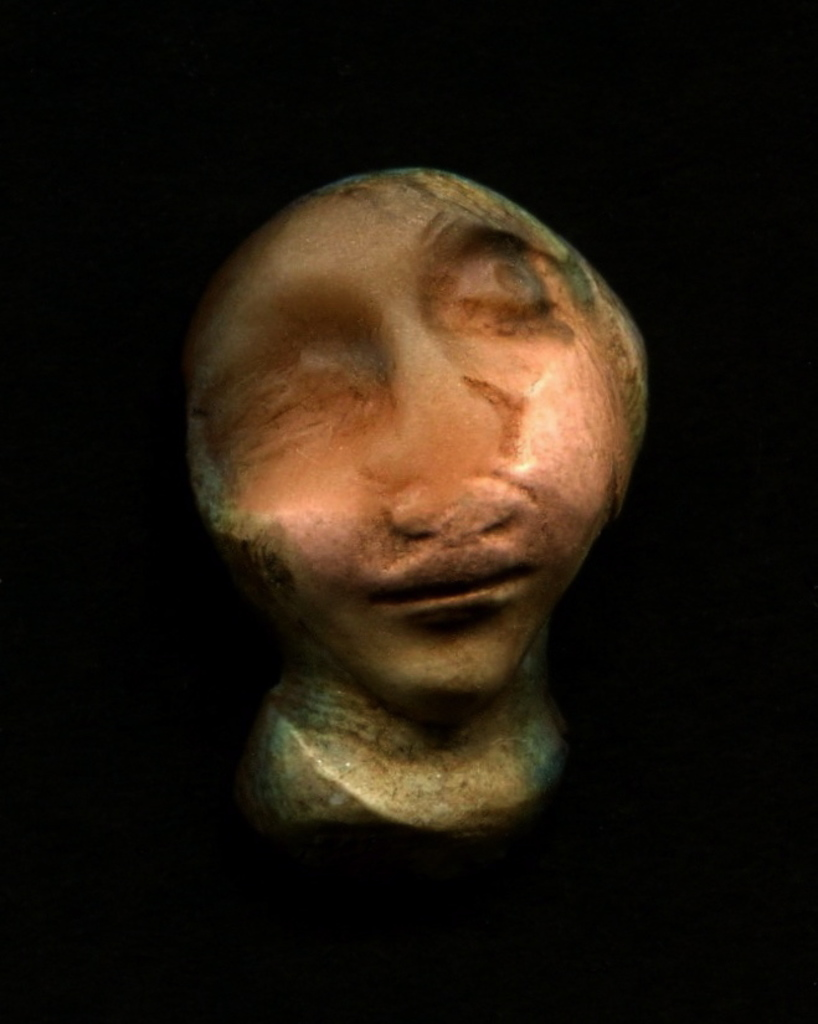

----------------------------------------------------
📸 96f7c7a2761401b4.jpg — Faces detected: 0


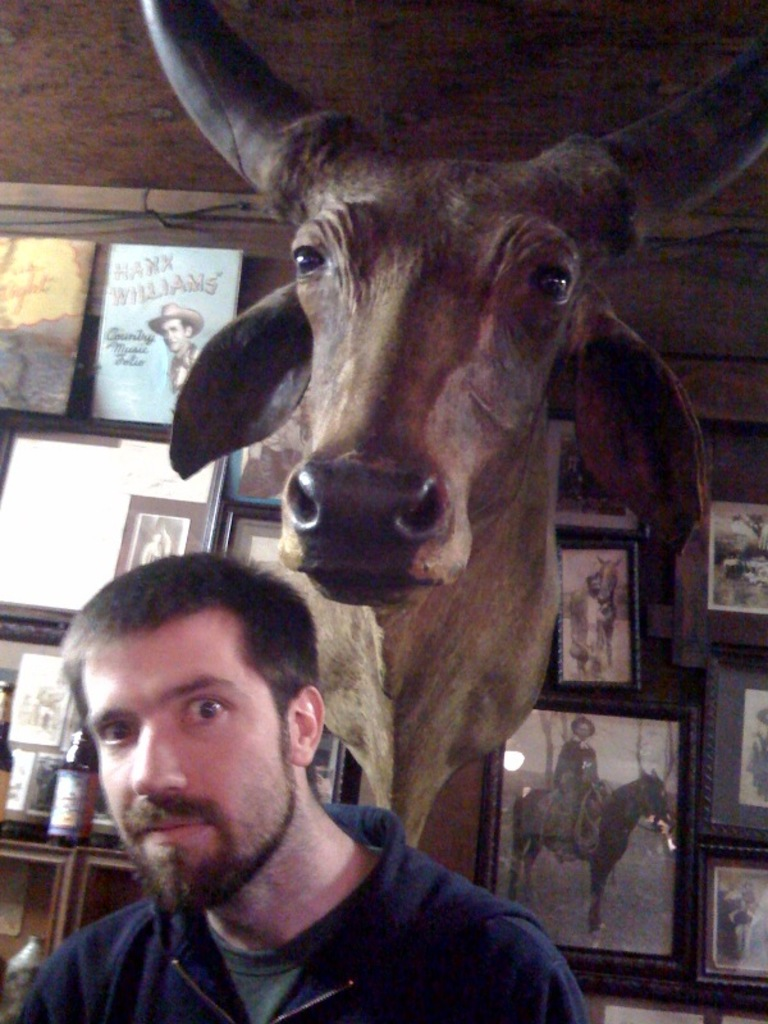

----------------------------------------------------
📸 8399d58e820647fb.jpg — Faces detected: 0


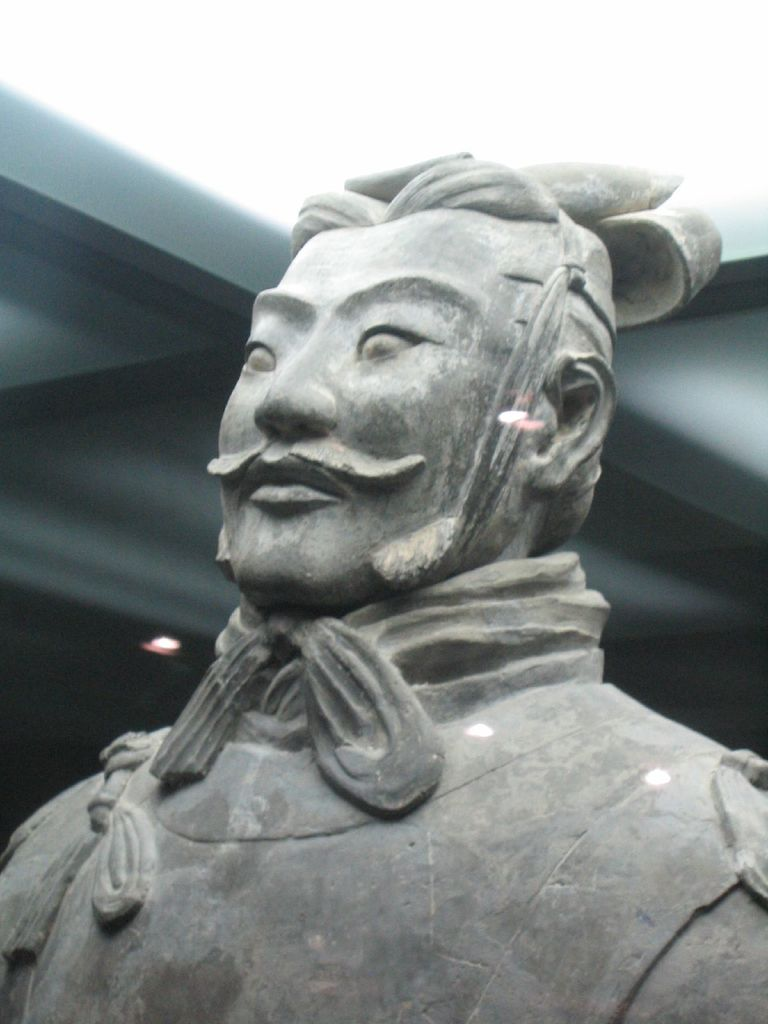

----------------------------------------------------
📸 db4d99198fc1cc3d.jpg — Faces detected: 1


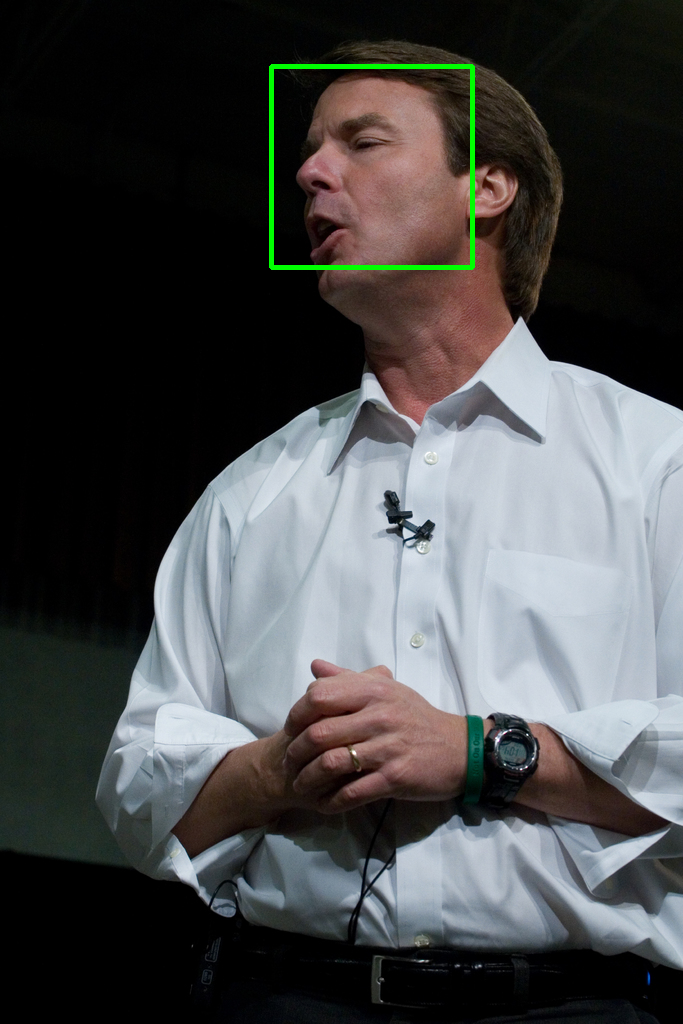

----------------------------------------------------
📸 3938a8cc855dc9aa.jpg — Faces detected: 0


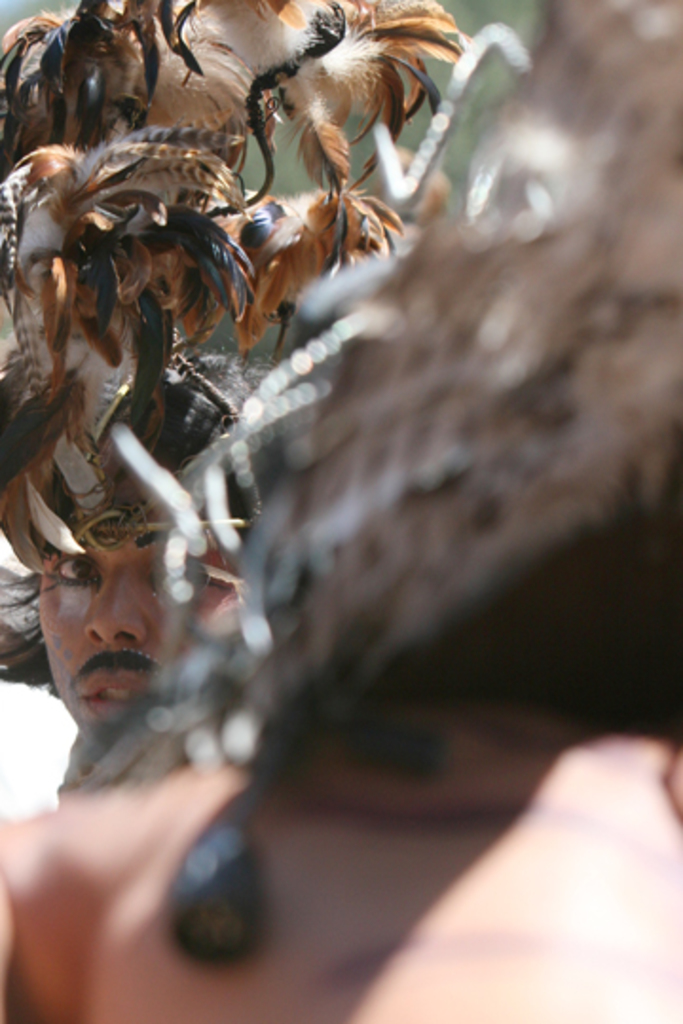

----------------------------------------------------


KeyboardInterrupt: 

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Path to your dataset folder
dataset_path = "/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/images/train"

# Load face cascade model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Loop through all images in dataset
for filename in os.listdir(dataset_path):

    # Check if file is image
    if filename.endswith(('.jpg', '.png', '.jpeg', '.JPG', '.PNG')):

        img_path = os.path.join(dataset_path, filename)
        image = cv2.imread(img_path)

        if image is None:
            print(f"⚠ Could not load: {filename}")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        print(f"📸 {filename} — Faces detected: {len(faces)}")

        # Draw rectangles on faces
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)

        # Display the result
        cv2_imshow(image)
        print("----------------------------------------------------")